In [4]:
from datascience import *
import numpy as np

## Tables ##

In [2]:
# Each row represents one ice-cream cone
cones = Table.read_table('cones.csv')
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [3]:
cones.show(2)

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75


In [4]:
cones.select('Flavor')

Flavor
strawberry
chocolate
chocolate
strawberry
chocolate
bubblegum


In [5]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [6]:
cones.select('Flavor', 'Price')

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


In [7]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [ ]:
cones.drop('Color')

In [ ]:
no_color = cones.drop('Color')

In [ ]:
no_color

In [ ]:
cones.sort('Price')

In [ ]:
cones.sort('Price', descending=True)

In [ ]:
cones.where('Flavor', 'chocolate')

In [ ]:
cones.where('Flavor', 'Chocolate')

In [ ]:
cones.drop('Color').sort('Price', descending=True)

# Creating Tables from Columns

In [2]:
streets = make_array('Bancroft','Durant','Channing','Haste')
locations = Table().with_column('Street',streets)

In [5]:
locations.with_column('Distance', np.arange(4))

Street,Distance
Bancroft,0
Durant,1
Channing,2
Haste,3


In [6]:
locations.with_column('Distance', np.arange(5))

ValueError: Column length mismatch. New column does not have the same number of rows as table.

In [7]:
locations

Street
Bancroft
Durant
Channing
Haste


In [ ]:
locations = locations.with_column('Distance', np.arange(4))

## NBA ##

In [10]:
# This table can be found online: 
# https://www.statcrunch.com/app/index.php?dataid=1843341

# NBA players, 2015-2016 season
nba = Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [9]:
nba.where('PLAYER', 'Stephen Curry')

PLAYER,POSITION,TEAM,SALARY
Stephen Curry,PG,Golden State Warriors,11.3708


In [ ]:
warriors = nba.where('TEAM', 'Golden State Warriors')

In [ ]:
warriors.show()

# Minard's Data

In [10]:
minard = Table.read_table('minard.csv')

In [11]:
minard

Longitude,Latitude,City,Direction,Survivors
32,54.8,Smolensk,Advance,145000
33.2,54.9,Dorogobouge,Advance,140000
34.4,55.5,Chjat,Advance,127100
37.6,55.8,Moscou,Advance,100000
34.3,55.2,Wixma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orscha,Retreat,20000
26.8,54.3,Moiodexno,Retreat,12000


In [12]:
minard.select('Survivors')

Survivors
145000
140000
127100
100000
55000
24000
20000
12000


In [13]:
minard.column('Survivors')

array([145000, 140000, 127100, 100000,  55000,  24000,  20000,  12000])

In [16]:
initial = minard.column('Survivors').item(0)
initial

145000

In [17]:
# how would we figure out what % of troops are left at each step?
minard.column('Survivors') / initial

array([1.        , 0.96551724, 0.87655172, 0.68965517, 0.37931034,
       0.16551724, 0.13793103, 0.08275862])

In [20]:
# how can we make this part of the Table?
proportion_surviving = minard.column('Survivors') / initial
minard = minard.with_column('Percent Surviving',proportion_surviving)
minard

Longitude,Latitude,City,Direction,Survivors,Proportion Surviving,Percent Surviving
32,54.8,Smolensk,Advance,145000,1,1
33.2,54.9,Dorogobouge,Advance,140000,0.965517,0.965517
34.4,55.5,Chjat,Advance,127100,0.876552,0.876552
37.6,55.8,Moscou,Advance,100000,0.689655,0.689655
34.3,55.2,Wixma,Retreat,55000,0.37931,0.37931
32,54.6,Smolensk,Retreat,24000,0.165517,0.165517
30.4,54.4,Orscha,Retreat,20000,0.137931,0.137931
26.8,54.3,Moiodexno,Retreat,12000,0.0827586,0.0827586


In [23]:
minard.set_format('Percent Surviving',PercentFormatter)

Longitude,Latitude,City,Direction,Survivors,Percent Surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


In [24]:
# PercentFormatter just effects the display
minard.column('Percent Surviving')

array([1.        , 0.96551724, 0.87655172, 0.68965517, 0.37931034,
       0.16551724, 0.13793103, 0.08275862])

In [25]:
# can also refer to columns by their index
minard.column(5)

array([1.        , 0.96551724, 0.87655172, 0.68965517, 0.37931034,
       0.16551724, 0.13793103, 0.08275862])

In [26]:
minard.labels

('Longitude',
 'Latitude',
 'City',
 'Direction',
 'Survivors',
 'Percent Surviving')

In [27]:
minard.num_rows

8

In [28]:
minard.num_columns

6

In [29]:
minard.move_to_start('City')

City,Longitude,Latitude,Direction,Survivors,Percent Surviving
Smolensk,32,54.8,Advance,145000,100.00%
Dorogobouge,33.2,54.9,Advance,140000,96.55%
Chjat,34.4,55.5,Advance,127100,87.66%
Moscou,37.6,55.8,Advance,100000,68.97%
Wixma,34.3,55.2,Retreat,55000,37.93%
Smolensk,32,54.6,Retreat,24000,16.55%
Orscha,30.4,54.4,Retreat,20000,13.79%
Moiodexno,26.8,54.3,Retreat,12000,8.28%


In [30]:
dir(minard)

['Row',
 'Rows',
 '_MutableMapping__marker',
 '__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_column_and_format',
 '_as_label',
 '_as_labels',
 '_columns',
 '_formats',
 '_get_column',
 '_get_column_formatters',
 '_join',
 '_join_helper',
 '_multi_index',
 '_multiple_join',
 '_num_rows',
 '_repr_html_',
 '_split_column_and_labels',
 '_unused_label',
 '_unused_label_in_either_table',
 '_use_html_if_available',
 '_varargs_as_labels',
 '_visualize',
 '_with_columns',
 'append',
 'append_column',

In [31]:
minard.relabeled('Percent Surviving','Percent Survived')

City,Longitude,Latitude,Direction,Survivors,Percent Survived
Smolensk,32,54.8,Advance,145000,100.00%
Dorogobouge,33.2,54.9,Advance,140000,96.55%
Chjat,34.4,55.5,Advance,127100,87.66%
Moscou,37.6,55.8,Advance,100000,68.97%
Wixma,34.3,55.2,Retreat,55000,37.93%
Smolensk,32,54.6,Retreat,24000,16.55%
Orscha,30.4,54.4,Retreat,20000,13.79%
Moiodexno,26.8,54.3,Retreat,12000,8.28%


# Working with Columns

In [34]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')
movies.show()

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2015,8.43,11128.5,702,Star Wars: The Force Awakens
2014,8.17,10360.8,702,American Sniper
2013,8.13,10923.6,688,Catching Fire
2012,7.96,10837.4,667,The Avengers
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,7.89,10565.6,536,Toy Story 3
2009,7.5,10595.5,521,Avatar
2008,7.18,9630.7,608,The Dark Knight
2007,6.88,9663.8,631,Spider-Man 3
2006,6.55,9209.5,608,Dead Man's Chest


In [36]:
# Figure out how many tickets were sold every year

movies.labels

('Year', 'Average Ticket Price', 'Total Gross', 'Number of Movies', '#1 Movie')

In [37]:
estimated_tickets_sold = movies.column('Total Gross') * (10 ** 6) / movies.column('Average Ticket Price')

In [41]:
movies = movies.with_column('Estimated Tickets Sold',estimated_tickets_sold)
movies.show(3)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets Sold
2015,8.43,11128.5,702,Star Wars: The Force Awakens,1.32011e+09
2014,8.17,10360.8,702,American Sniper,1.26815e+09
2013,8.13,10923.6,688,Catching Fire,1.34362e+09


In [42]:
movies.set_format('Estimated Tickets Sold',NumberFormatter)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets Sold
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2010,7.89,10565.6,536,Toy Story 3,"1,339,112,801.01"
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"
2008,7.18,9630.7,608,The Dark Knight,"1,341,323,119.78"
2007,6.88,9663.8,631,Spider-Man 3,"1,404,622,093.02"
2006,6.55,9209.5,608,Dead Man's Chest,"1,406,030,534.35"


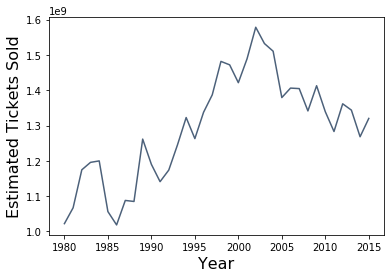

In [44]:
# draw a time series ('plot of something against time')
# Number of Tickets against time
# Table.plot(x_data,y_data)

%matplotlib inline
movies.plot('Year','Estimated Tickets Sold')

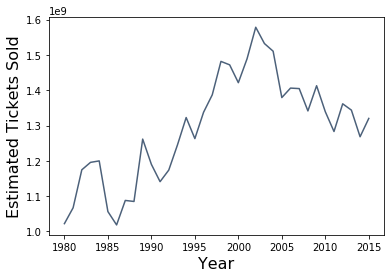

In [45]:
movies.plot(0, 5)

# Working with Rows

In [46]:
movies.where('Year',are.between(2000,2005))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets Sold
2004,6.21,9380.5,551,Shrek 2,"1,510,547,504.03"
2003,6.03,9239.7,506,Return of the King,"1,532,288,557.21"
2002,5.8,9155,479,Spider-Man,"1,578,448,275.86"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"
2000,5.39,7661,478,The Grinch,"1,421,335,807.05"


In [47]:
movies.where('Year',are.equal_to(2002))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets Sold
2002,5.8,9155,479,Spider-Man,"1,578,448,275.86"


In [51]:
movies.where('#1 Movie', are.containing('Harry Potter'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets Sold
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"


In [52]:
movies.where('Year',are.below(1990))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets Sold
1989,3.99,5033.4,502,Batman,"1,261,503,759.40"
1988,4.11,4458.4,510,Rain Man,"1,084,768,856.45"
1987,3.91,4252.9,509,Three Men and a Baby,"1,087,698,209.72"
1986,3.71,3778,451,Top Gun,"1,018,328,840.97"
1985,3.55,3749.2,470,Back to the Future,"1,056,112,676.06"
1984,3.36,4031,536,Beverly Hills Cop,"1,199,702,380.95"
1983,3.15,3766,495,Return of the Jedi,"1,195,555,555.56"
1982,2.94,3453,428,E.T.,"1,174,489,795.92"
1981,2.78,2966,173,Raiders / Lost Ark,"1,066,906,474.82"
1980,2.69,2749,161,The Empire Strikes Back,"1,021,933,085.50"


In [54]:
movies.take(np.arange(5,11))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Estimated Tickets Sold
2010,7.89,10565.6,536,Toy Story 3,"1,339,112,801.01"
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"
2008,7.18,9630.7,608,The Dark Knight,"1,341,323,119.78"
2007,6.88,9663.8,631,Spider-Man 3,"1,404,622,093.02"
2006,6.55,9209.5,608,Dead Man's Chest,"1,406,030,534.35"
2005,6.41,8840.5,547,Revenge of the Sith,"1,379,173,166.93"
